In [114]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

### Generate a sequence of 6D key frame poses

In [33]:
translation_x = np.linspace(0, 1, 100)
translation_y = np.sin(2*np.pi*translation_x)
translation_z = np.linspace(0, 1, 100)

translation = np.stack((translation_x, translation_y, translation_z)).T
rotation = np.stack([np.zeros(3) for _ in range(100)])

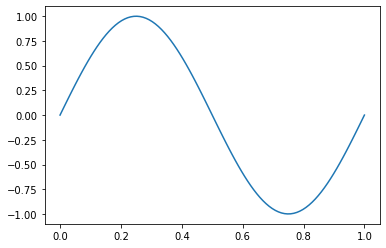

In [34]:
plt.plot(translation_x, translation_y)

In [35]:
translation.shape, rotation.shape

((100, 3), (100, 3))

### Generate 3D GPS measurements

In [121]:
R, _ = cv2.Rodrigues(np.array([0.,0.,0.]))
T = np.array([0.0, 0.0, 0.0])
scale = 1.05

translation_gps = scale * (np.matmul(R, translation.T).T + T)

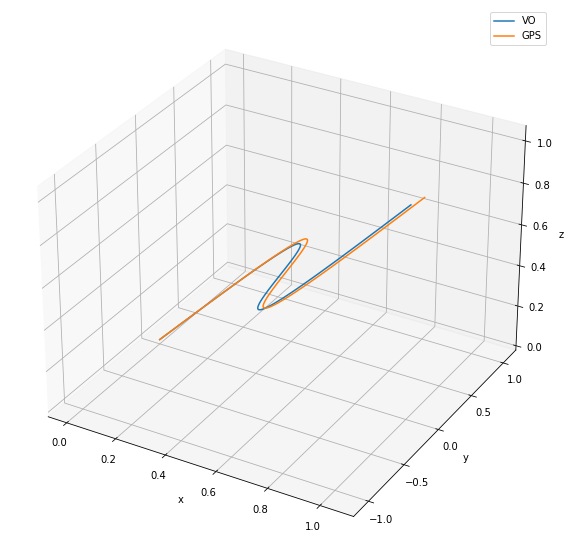

In [122]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(translation[:, 0], translation[:, 1], translation[:, 2])
ax.plot(translation_gps[:, 0], translation_gps[:, 1], translation_gps[:, 2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend(["VO", "GPS"])
plt.show()

### Generate 3D map points